In [ ]:
#from scipy import stats
#import numpy as np
import pandas as pd
#import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [ ]:
%cd  'Progetto Covid Gruppo Horror'/

%ls

In [ ]:
df_ripartizioni_reg=pd.read_csv("covid19_reg_ripartite.csv", sep=";")

In [ ]:
#cancello colonne superflue
df_ripartizioni_reg=df_ripartizioni_reg.drop(df_ripartizioni_reg.loc[:, 'Unnamed: 13':'Unnamed: 17'].columns, axis = 1)

In [ ]:
#conversione della data
df_ripartizioni_reg['Date'] = pd.to_datetime(df_ripartizioni_reg['Date'])

In [ ]:
#nuova colonna ottenuta con Regioni raggruppate e differenziaata
df_ripartizioni_reg['Daily_Deaths'] = df_ripartizioni_reg.groupby('RegionName')['Deaths'].diff()
#sostituzione dei valori nan della nuova colonna prendendoli nella prima (qualora ci sono valori nan)
df_ripartizioni_reg['Daily_Deaths'] = df_ripartizioni_reg['Daily_Deaths'].fillna(df_ripartizioni_reg['Deaths'])
print(df_ripartizioni_reg[['Date', 'RegionName', 'Daily_Deaths']])
#creazione del nuovo file csv
df_ripartizioni_reg.to_csv("covid19_region_python_w_daily_deaths.csv", index=False)

In [ ]:
#import del nuovo file
df_ripartizioni_reg=pd.read_csv("covid19_region_python_w_daily_deaths.csv", sep=",")

In [ ]:
#Controllo i dati ottenuti tramite la nuova colonna
somma_morti_giornaliere = df_ripartizioni_reg.groupby('RegionName')['Daily_Deaths'].sum()
print(somma_morti_giornaliere)
somma_morti_giornaliere = df_ripartizioni_reg['Daily_Deaths'].sum()
print(somma_morti_giornaliere)

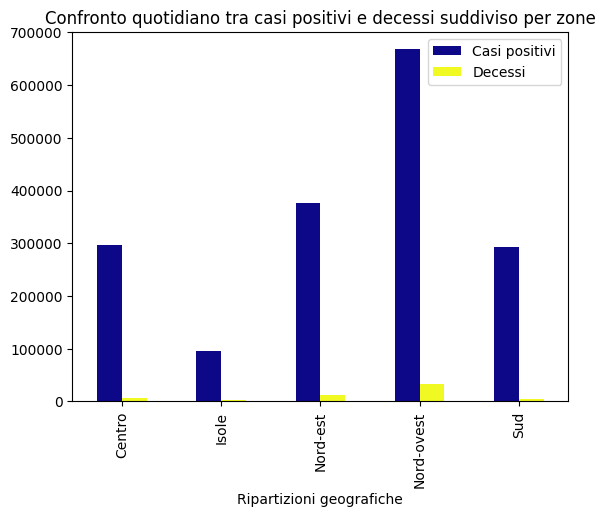

In [ ]:
#grafico a barre confronto
andamento_casi_regione = df_ripartizioni_reg.groupby('Ripartizioni geografiche')[["NewPositiveCases", 'Daily_Deaths']].sum()
andamento_casi_regione.plot(kind="bar", colormap="plasma")
plt.legend(['Casi positivi', 'Decessi'])
plt.title("Confronto quotidiano tra casi positivi e decessi suddiviso per zone")
plt.show()